# Step 1: Import data and libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from os.path import join

In [2]:
# Create path

path = r'/Users/kevinmcgreen/Documents/InstacartProject/03 Scripts/Prepared Data/orders_products_merged.pkl'

In [3]:
# Import data

ords_prods_merged_df = pd.read_pickle('/Users/kevinmcgreen/Documents/InstacartProject/03 Scripts/Prepared Data/orders_products_merged.pkl')

In [4]:
# check columns
ords_prods_merged_df.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'Unnamed: 0_y', 'product_name', 'aisle_id', 'department_id', 'prices'],
      dtype='object')

In [5]:
# check data

ords_prods_merged_df.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices
0,0,2539329,1,prior,1,2,8,-1.0,196,1,0,both,195,Soda,77,7,9.0
1,0,2539329,1,prior,1,2,8,-1.0,14084,2,0,both,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5
2,0,2539329,1,prior,1,2,8,-1.0,12427,3,0,both,12427,Original Beef Jerky,23,19,4.4
3,0,2539329,1,prior,1,2,8,-1.0,26088,4,0,both,26089,Aged White Cheddar Popcorn,23,19,4.7
4,0,2539329,1,prior,1,2,8,-1.0,26405,5,0,both,26406,XL Pick-A-Size Paper Towel Rolls,54,17,1.0


## Step 2: Clean data

In [6]:
# Rename columns
ords_prods_merged_df.rename(columns = {'user_id' : 'customer_id', 'order_dow' : 'order_day_of_week'}, inplace= True)

In [7]:
# chceck for results
ords_prods_merged_df.head()

,Unnamed: 0_x,order_id,customer_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices
0,0,2539329,1,prior,1,2,8,-1.0,196,1,0,both,195,Soda,77,7,9.0
1,0,2539329,1,prior,1,2,8,-1.0,14084,2,0,both,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5
2,0,2539329,1,prior,1,2,8,-1.0,12427,3,0,both,12427,Original Beef Jerky,23,19,4.4
3,0,2539329,1,prior,1,2,8,-1.0,26088,4,0,both,26089,Aged White Cheddar Popcorn,23,19,4.7
4,0,2539329,1,prior,1,2,8,-1.0,26405,5,0,both,26406,XL Pick-A-Size Paper Towel Rolls,54,17,1.0


In [8]:
# Dropping unnecessary columns
ords_prods_merged_df.drop(axis= 1, inplace= True, columns= 'eval_set')

In [9]:
ords_prods_merged_df.head()

,Unnamed: 0_x,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices
0,0,2539329,1,1,2,8,-1.0,196,1,0,both,195,Soda,77,7,9.0
1,0,2539329,1,1,2,8,-1.0,14084,2,0,both,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5
2,0,2539329,1,1,2,8,-1.0,12427,3,0,both,12427,Original Beef Jerky,23,19,4.4
3,0,2539329,1,1,2,8,-1.0,26088,4,0,both,26089,Aged White Cheddar Popcorn,23,19,4.7
4,0,2539329,1,1,2,8,-1.0,26405,5,0,both,26406,XL Pick-A-Size Paper Towel Rolls,54,17,1.0


In [10]:
# dropping columns
ords_prods_merged_df = ords_prods_merged_df.drop(['Unnamed: 0_x'], axis= 1)

In [11]:
ords_prods_merged_df.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices
0,2539329,1,1,2,8,-1.0,196,1,0,both,195,Soda,77,7,9.0
1,2539329,1,1,2,8,-1.0,14084,2,0,both,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5
2,2539329,1,1,2,8,-1.0,12427,3,0,both,12427,Original Beef Jerky,23,19,4.4
3,2539329,1,1,2,8,-1.0,26088,4,0,both,26089,Aged White Cheddar Popcorn,23,19,4.7
4,2539329,1,1,2,8,-1.0,26405,5,0,both,26406,XL Pick-A-Size Paper Towel Rolls,54,17,1.0


##  Step 3: Create Histogram

In [12]:
# checking data
ords_prods_merged_df['order_hour_of_day'].describe()

count    3.243421e+07
mean     1.342500e+01
std      4.246351e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [13]:
ords_prods_merged_df['order_hour_of_day'].mean()

np.float64(13.42499561882373)

In [14]:
ords_prods_merged_df['order_hour_of_day'].median()

13.0

In [15]:
ords_prods_merged_df['order_hour_of_day'].max()

23

<Axes: ylabel='Frequency'>

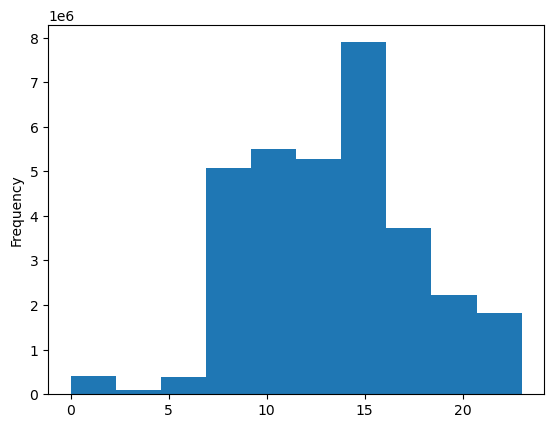

In [16]:
# creating histogram 
ords_prods_merged_df['order_hour_of_day'].plot.hist()

### Interpretation of Histogram
* The histogram shows that, the majority of orders are placed between 7 AM and 4 PM, with a noticable peak around 10 Am.
* This indicates a sztrong preference for ordering in the late morning hours.

## Step 4: Bar chart for loyalty flag

In [17]:
# create path
path = r'/Users/kevinmcgreen/Documents/InstacartProject/03 Scripts/Prepared Data/ords_prods_merged_with_flags.pkl'

In [18]:
# Import data
ords_prods_merged_with_flags_df = pd.read_pickle('/Users/kevinmcgreen/Documents/InstacartProject/03 Scripts/Prepared Data/ords_prods_merged_with_flags.pkl')

In [19]:
# check data
ords_prods_merged_with_flags_df.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,Unnamed: 0_y,product_name,aisle_id,department_id,prices,user_order_avg,loyalty_flag,loyalty-flag,spending_flag,order_frequency_flag
0,0,2539329,1,prior,1,2,8,-1.0,196,1,...,195,Soda,77,7,9.0,5.813559,5.813559,NaN,Low spender,Regular Customer
1,0,2539329,1,prior,1,2,8,-1.0,14084,2,...,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,5.813559,5.813559,NaN,Low spender,Regular Customer
2,0,2539329,1,prior,1,2,8,-1.0,12427,3,...,12427,Original Beef Jerky,23,19,4.4,5.813559,5.813559,NaN,Low spender,Regular Customer
3,0,2539329,1,prior,1,2,8,-1.0,26088,4,...,26089,Aged White Cheddar Popcorn,23,19,4.7,5.813559,5.813559,NaN,Low spender,Regular Customer
4,0,2539329,1,prior,1,2,8,-1.0,26405,5,...,26406,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,5.813559,5.813559,NaN,Low spender,Regular Customer


In [20]:
# checking for nunique values
print(ords_prods_merged_with_flags_df['loyalty_flag'].unique())

[ 5.81355932  8.03589744  6.         ...  8.11659193 25.50516987
  6.9379845 ]


In [21]:
# values in loyalty_flag
print(ords_prods_merged_with_flags_df['loyalty_flag'].value_counts())

loyalty_flag
2.000000    51117
3.000000    33600
4.000000    22654
2.500000    20294
5.000000    15581
            ...  
1.294118       17
1.176471       17
1.187500       16
1.437500       16
1.285714       14
Name: count, Length: 91171, dtype: int64


In [22]:
ords_prods_merged_with_flags_df.rename(columns={'loyalty_flag' : 'frequency'}, inplace= True)

In [23]:
# creating proper flags
def loyalty_flag(freq):
    if freq >= 4:
        return 'Loyal'
    elif freq >= 2:
        return'Regular'
    else: 
        return 'New'

In [24]:
ords_prods_merged_with_flags_df['loyalty_flag'] = ords_prods_merged_with_flags_df['frequency'].apply(loyalty_flag)

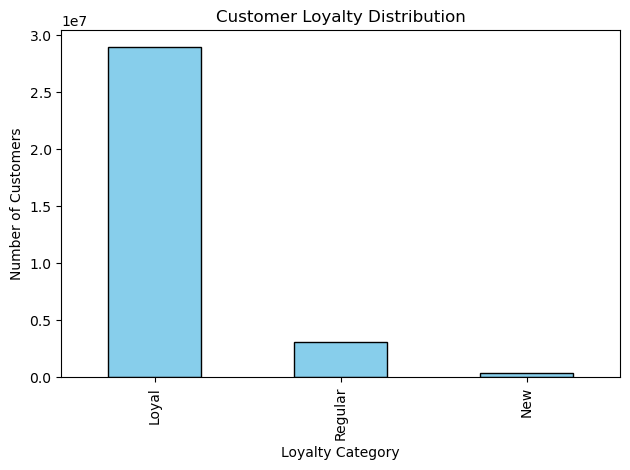

In [25]:
ords_prods_merged_with_flags_df['loyalty_flag'].value_counts().plot.bar(color = 'skyblue', edgecolor= 'black')
plt.title('Customer Loyalty Distribution')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('customer_loyalty_distribution')
plt.show()

### Customer loyalty distribution.
The bar chart shows how customers are distributed across different loyalty categories:
* Loyal customers are a strong segment,showing consistent repeat purchase behavior.
* Regular customers make are low spenders, indicating they return often but not yet at the most frequent level.
* New customers represents the smalles group, suggesting there's a room for growth in onboarding and first time engagement strategies.
* This break down helps the marketing team identify where to focus their campaigns such as nurturing new customers into regular customers and rewarding loyal customers to increase retention.
  


## Step 5: Prices by hour of the day

In [26]:
# Group by hour and calculate mean price
avg_prices_by_hour = ords_prods_merged_df.groupby('order_hour_of_day')['prices'].mean()

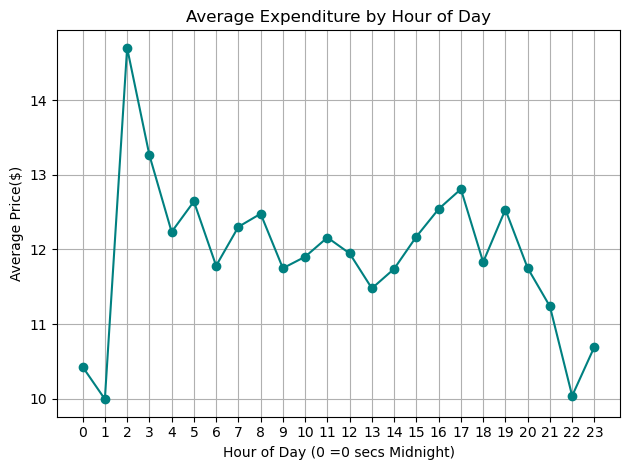

In [27]:
# Plotting the average price by hour of day
avg_prices_by_hour.plot.line(color= 'teal', marker= 'o')
plt.title('Average Expenditure by Hour of Day')
plt.xlabel('Hour of Day (0 =0 secs Midnight)')
plt.ylabel('Average Price($)')
plt.grid(True)
plt.xticks(range(0, 24)) 
plt.tight_layout()
plt.savefig('expenditure_by_hour.png')
plt.show()

### Average expenditure by hour of the day
This linbe chart shows how the average price of products varies based on the hour when orders were placed.
* Peak expenditure occurs in the early mornings to early afternoon.
* Lower average spending occurs in the evenings,suggestion these purchases might smaller or more routine.
* This insight can help time promotions and personalized recommendations for maximum customer spending.


## Step 6: Scatterplot

In [28]:
# Import data
customer_df = pd.read_pickle('/Users/kevinmcgreen/Documents/InstacartProject/03 Scripts/Prepared Data/customers_clean.pkl')

In [29]:
# check for results
customer_df.head()

,customer_id,first_name,surname,gender,state,age,date_joined,num_dependents,family_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374


In [30]:
# Drop missing values if there's any
customer_df = customer_df.dropna(subset=['age','income'])

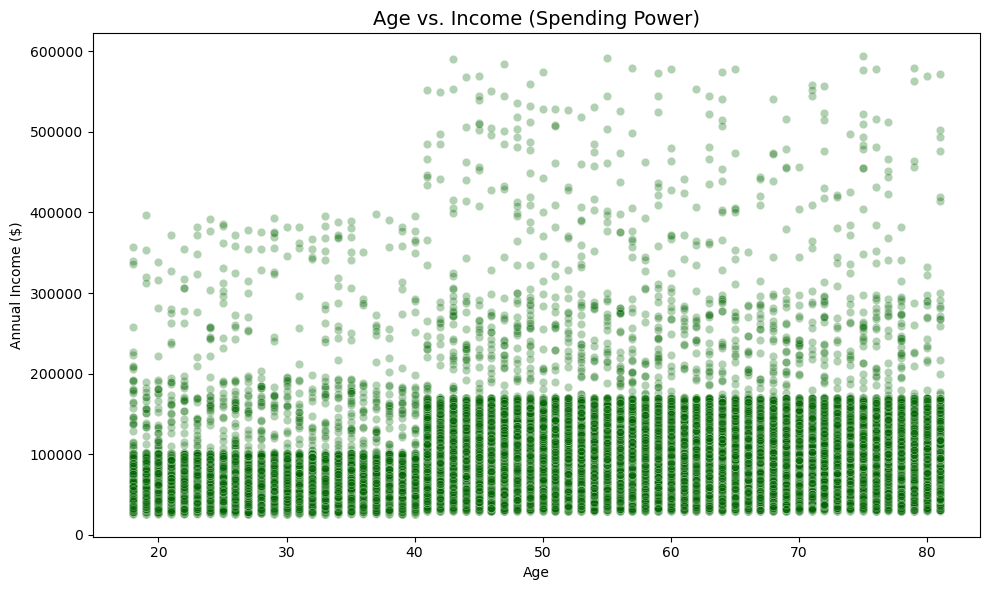

In [31]:
# create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_df,
                x= 'age',
                y= 'income',
alpha= 0.3,
color= 'darkgreen')
plt.title('Age vs. Income (Spending Power)', fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')
plt.tight_layout()
plt.savefig('age_vs_income.png')
plt.show()

### What scatterplot shows with Age vs. Income
* This scatterplot shows the relationship between a customer's age and and their annual income.
* There's no clear linear correlation between age and income.
* Most customers are between the ages of 25 and 60, with income ranging from $20,000 and $100,00.
* There are some outliers with very high income across different age ranges but they are few.
* This suggests that spending power isn't tied strictly to age and marketing strategies should consider income independently from age when targeting segments.
* Overall, the chart indicates a broad spread of income levels across all adult age groups.